## Some general remarks before you start...
Please, be organized and clean when coding. When printing something, please write a small description (for example, instead of *print(total_fireworks)* do something like *print("Number of fireworks in new year: ", total_fireworks))*. Graphs have to have their respective axes, labels and legend. This will help us to correct your notebook quicker and will give you more points. 

# Introduction and overview

In this task you will learn the basics to develop recurrent neural networks (RNN), specifically Long Short-Term Memory Networks (LSTM). This kind of algorithms are well known because of their ability to describe time dependencies in the data. Normally, if you are trying to model a signal or the response of a causal system, RNNs are one of your first options to consider (along with typical statistical methods as linear regressions, exponential smoothing, ARIMA models, etc., which will not be considered in this task). Because of the recursive connections in the neural network, a kind of memory is developed in RNNs, which describes well time series. This is particularly helpful when forecasting. Forecasts are used by many businesses to help in budgeting, planning, and estimating future growth. In other words, it is the attempt to predict future outcomes based on past events.

This task is organized as follows: First, some theoretical background about time series analysis and forecasting will be given. Then, you will go deeper in data preparation for time series, which is the first step you have to do before beginning any forecasting project. After this, the most interesting part will be explained: LSTMs. We will first consider a simple vanilla LSTM, with one hidden layer. Afterwards, we will stack several layers and compare the results to the vanilla solution. At the end, you will explore a TV Script generator, using your acquired knowledge on time series and LSTM Networks. 

# Time series forecasting
A time series is a sequence of observations taken sequentially in time. These observations are normally measurements in form of numerical values. For example, the battery level of an electric car measured every five minutes can be expressed as a time series. 

## Describing vs. predicting
Understanding a dataset, called time series analysis, is an important step before beginning working with the dataset. This can help to make better predictions. However, a deep time series analysis is not required, since it can result in a large technical investment, in time and expertise, not directly aligned with the desired outcome, which is forecasting the future.

In descriptive modeling, or __time series analysis__, a time series is modeled to determine its components in terms of seasonal patterns, trends, relation to external factors, and the like. In contrast, __time series forecasting__ uses the information in a time series (often together with additional information) to forecast future values of the series. [4]

# Problem definition
In the following tutorial you will work with a simple dataset of daily total female births from year 1959. The main goal will be to forecast the number of daily female births for the last month of the year using different LSTM structures. 

First, explore the dataset given to you. Load the csv file *daily-total-female-births.csv*, print some data elements, check the size of the file, use the __[describe()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)__ function from Pandas to check the mean, standard deviation, median, minimum, and maximum of the observations. This may help to get an idea of the distribution and spread of values. This can also give you some ideas of data scaling and even data cleaning that you can perform later as part of preparing your dataset for modeling.

In this task we will use Series from Pandas as Data Structure. For more information, please refer to the official Pandas documentation [Intro to Data Structures](http://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html).

<class 'pandas.core.series.Series'>
Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64
There are 365 elements in the csv file.


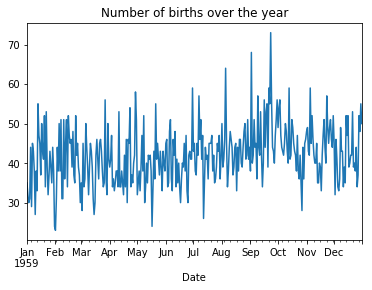

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64


In [14]:
from pandas import read_csv
#### WRITE YOUR CODE HERE ####

# load dataset using read_csv() and squeeze=True to return a Series instead of a DataFrame

series = read_csv('daily-total-female-births.csv', index_col=0, parse_dates=True, squeeze=True, header=0)

# Check that a Series data type (and not a DataFrame) was created
print(type(series))

# Print some rows of the dataset (Hint: use .head() for this)

print(series.head())

# Check the size of the csv file (Hint: use .size for this)

print('There are', series.size, 'elements in the csv file.')

# Check something else from the series if you are curious...

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = series.plot(ax=ax, kind='line', x='Date', y='Births')
plt.title('Number of births over the year')

plt.show()

# Calculate descriptive statistics on your time series using describe()

print(series.describe())


### Taxonomy of time series forecasting problems

To improve the understanding of the forecast problem, the structure required by the model and how to evaluate it, it is recommended to consider the following keypoints before starting any time series forecasting project [2]:

- __Inputs vs. Outputs__: The input data are the values used to make a forecast. For example, the last seven days of sales data to forecast the next day sales. The input data are not the data used to train the model but for testing/predicting.<br>
    The output data correspond to the prediction or forecast for a future time step beyond the data provided as input.<br>
    Defining the inputs and outputs of the model forces you to think about what exactly is or may be required to make a forecast. You may not be able to be specific when it comes to input data. For example, you may not know whether one or multiple prior time steps are required to make a forecast. But you will be able to identify the variables that could have any influence in the forecasting process.

- __Endogenous vs. Exogenous input variables__: An input variable is endogenous if it is afected by other variables in the system and the output variable depends on it. In a time series, the observations for an input variable depend upon one another. For example, the observation at time *t* is dependent upon the observation at _t-1_; _t-1_ may depend on _t-2_, and so on. <br>
    An input variable is an exogenous variable if it is independent of other variables in the system and the output variable depends upon it. Put simply, endogenous variables are infuenced by other variables in the system (including themselves) whereas exogenous variables are not and are considered as outside the system.<br>
    Typically, a time series forecasting problem has endogenous variables (e.g. the output is a function of some number of prior time steps) and may or may not have exogenous variables. Often, exogenous variables are ignored. Explicitly thinking about both variable types may help to identify easily overlooked exogenous data or even engineered features that may improve the model.
    
- __Unstructured vs. Structured__: It is useful to plot each variable in a time series and inspect the plot looking for possible patterns. A time series for a single variable may not have any obvious pattern. We can think of a series with no pattern as unstructured, as in there is no discernible time-dependent structure. <br>
    Alternately, a time series may have obvious patterns and can be decomposed into four constituent parts: 
    - Level: The baseline value for the series if it were a straight line.
    - Trend: The optional and often linear increasing or decreasing behavior of the series over time.
    - Seasonality: The optional repeating patterns or cycles of behavior over time.
    - Noise: The optional variability in the observations that cannot be explained by the model.<br>
    
- __Regression vs. Classification__: Regression predictive modeling problems are those where a quantity is predicted. A quantity is a numerical value; for example a price, a count, a volume, and so on. A time series forecasting problem in which you want to predict one or more future numerical values is a regression type predictive modeling problem. <br>
    Classification predictive modeling problems are those where a category is predicted. A category is a label from a small well-defined set of labels. For example hot, cold, up, down, and buy, sell are categories. A time series forecasting problem in which you want to classify input time series data is a classification type predictive modeling problem. <br>
    There is some flexibility between these types. For example, a regression problem can be reframed as classiffication and a classification problem can be reframed as regression. Some problems, like predicting an ordinal value, can be framed as either classification and regression. It is possible that a reframing of your time series forecasting problem may simplify it.

- __Univariate vs. Multivariate__: A single variable measured over time is referred to as a univariate time series. Multiple variables measured over time is referred to as a multivariate time series. Considering this question with regard to inputs and outputs may add a further distinction. The number of variables may differ between the inputs and outputs, e.g. the data may not be symmetrical. For example, you may have multiple variables as input to the model and only be interested in predicting one of the variables as output. In this case, there is an assumption in the model that the multiple input variables aid and are required in predicting the single output variable.

- __Single-step vs. Multi-step__: A forecast problem that requires a prediction of the next time step is called a one-step forecast model. Whereas a forecast problem that requires a prediction of more than one time step is called a multi-step forecast model. The more time steps to be projected into the future, the more challenging the problem given the compounding nature of the uncertainty on each forecasted time step.

- __Static vs. Dynamic__: It is possible to develop a model once and use it repeatedly to make predictions. Given that the model is not updated or changed between forecasts, we can think of this model as being static. Conversely, we may receive new observations prior to making a subsequent forecast that could be used to create a new model or update the existing model. We can think of developing a new or updated model prior to each forecasts as a dynamic problem.

- __Contiguous vs. Discontiguous__: A time series where the observations are uniform over time may be described as contiguous. Many time series problems have contiguous observations, such as one observation each hour, day, month or year. A time series where the observations are not uniform over time may be described as discontiguous. The lack of uniformity of the observations may be caused by missing or corrupt values. It may also be a feature of the problem where observations are only made available sporadically or at increasingly or decreasingly spaced time intervals. In the case of non-uniform observations, specific data formatting may be required when fitting some models to make the observations uniform over time.

Now it is your time to evaluate the taxonomy of the proposed problem of predicting the number of daily female births for the last month of the year 1959. Write a short description of this problem using the keypoints described above.

**Answer:**
* The only input variable is the number of births per day, which is an **exogenous** variable.
* The dataset is **structured**.
* Since we want to forecast numerical values for the number of births, we are working with a **regression** predictive modeling problem
* We are only measuring one variable over the time, which means we have a **univariate** time series
* We want to predict the number of daily births for an entire month, therefore it is a **multi-step** problem
* Since the number of births each day don't seem to have a significant influence on the number of births of the next day, we will probably work with a **static** model
* We have observations of each day, so the series is **contiguous**

# Data preparation 

## Decompose Time Series Data 
A given time series is thought to consist of three systematic components including __level__, __trend__, __seasonality__, and one non-systematic component called __noise__. A series is thought to be an aggregate or combination of these four components. All series have a level and noise. The trend and seasonality components are optional. In this section methods to automatically decompose a time series are explained.

The [Statsmodels](https://www.statsmodels.org/stable/index.html) library provides an implementation of the naive, or classical, decomposition method in a function called *seasonal_decompose()*. It requires to specify whether the model is additive or multiplicative. 

__Important:__ This function produces a naive decomposition. More sophisticated methods should be preferred for more advanced analysis.<br>
The additive model is described as Y[t] = T[t] + S[t] + e[t]<br>
The multiplicative model is Y[t] = T[t] * S[t] * e[t]<br>
The seasonal component is first removed by applying a convolution filter to the data. The average of this smoothed series for each period is the returned seasonal component.<br>

When the type of decomposition model is unknown, a review of a plot of the time series and some summary statistics can often be a good start. These will give an idea of whether the time series problem looks additive or multiplicative.

Figure 1 shows two different time series, which can be decompose with the additive (left) and multiplicative (rigth) method. Look at the form of the series and how different they are. 

<img src="images\additive-Multiplicative-Decomposition-time-series.png" alt="drawing" style="width:700px;"/>
<p style="text-align: center;">
    Fig. 1 - Example of an additive (left, [10]) and a multiplicative decomposition of time series (right, [1]).
</p>

In the following snippet you can see the code for an additive seasonal decomposition. Complete the code to plot all components in one graph. Also write a code to plot a single component in one graph, for example the trend. (Hint: *sm.tsa.seasonal_decompose* returns a DecomposeResult. This has the attributes *observed, trend, seasonal* and *resid*, which are pandas series. You can plot each of them using the pandas plot functionality)

Afterwards, decompose the same signal with the multiplicative model and compare. What can you conclude from both decomposition models?

The results of the deomposition models are fairly similar.

Additive decomposition of the time series


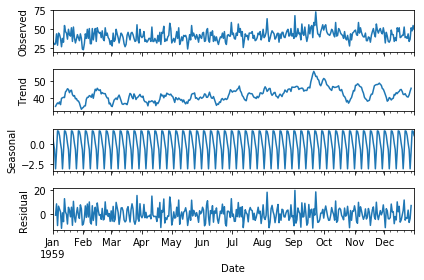

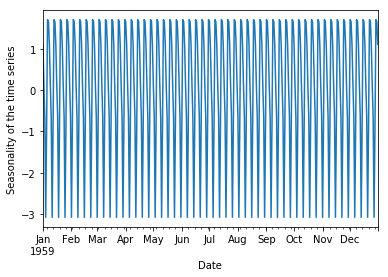

Multiplicative decomposition of the time series


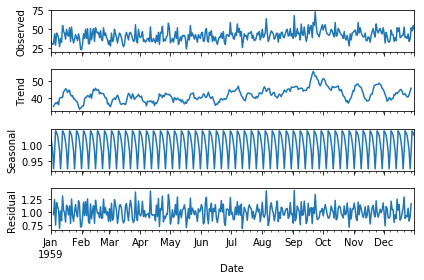

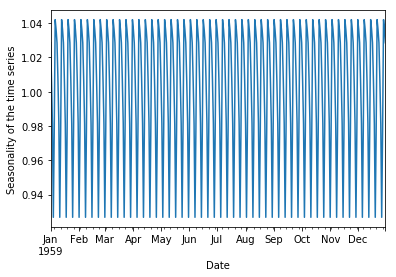

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt

result_add = seasonal_decompose(series, model='additive')
trend_add = result_add.trend
seasonality_add = result_add.seasonal
residual_add = result_add.resid
original_data = result_add.observed

#### WRITE YOUR CODE HERE ####

# Plot all components of the time series

print('Additive decomposition of the time series')

result_add.plot()

plt.show()

# Plot a single component, for example, the seasonality

seasonality_addi = seasonality_add.plot()
seasonality_addi.set_ylabel('Seasonality of the time series')

plt.show()

## Multiplicative decomposition

result_mult = seasonal_decompose(series, model='multiplicative')
trend_mult = result_mult.trend
seasonality_mult = result_mult.seasonal
residual_mult = result_mult.resid
original_data = result_mult.observed

# Plot all components of the time series

print('Multiplicative decomposition of the time series')

result_mult.plot()

plt.show()

# Plot a single component

seasonality_multi = seasonality_mult.plot()
seasonality_multi.set_ylabel('Seasonality of the time series')

plt.show()


## Normalize the data
Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1. This helps the neural network to learn easier the trends of the data. 

The library _Scikit-learn_ has a tool called *MinMaxScaler* that can be used to scale the data. The next steps are the general steps to follow:
- Fit the scaler using the available training data. For normalization, this means the training data will be used to estimate the minimum and maximum observable values. This is done by calling the __fit()__ function.
- Apply the scale to the training data, in order to use the normalized data to train your model. This is done by calling the __transform()__ function.
- Apply the scale to the data used for forward pass. This prepares the data that you will use to make predictions.

In [15]:
from sklearn.preprocessing import MinMaxScaler

# prepare data for normalization
values = series.values
values = values.reshape((len(values), 1))

# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# normalize the dataset and print
normalized = scaler.transform(values)
print("Normalized values:\n %s" %(normalized))

# inverse transform and print
inversed = scaler.inverse_transform(normalized)
print("Denormalized values:\n %s" %(inversed))

Min: 23.000000, Max: 73.000000
Normalized values:
 [[0.24]
 [0.18]
 [0.14]
 [0.16]
 [0.42]
 [0.12]
 [0.44]
 [0.4 ]
 [0.3 ]
 [0.08]
 [0.3 ]
 [0.2 ]
 [0.64]
 [0.48]
 [0.44]
 [0.28]
 [0.54]
 [0.4 ]
 [0.36]
 [0.58]
 [0.22]
 [0.6 ]
 [0.32]
 [0.18]
 [0.28]
 [0.4 ]
 [0.32]
 [0.24]
 [0.42]
 [0.3 ]
 [0.02]
 [0.  ]
 [0.16]
 [0.42]
 [0.3 ]
 [0.54]
 [0.3 ]
 [0.56]
 [0.16]
 [0.16]
 [0.56]
 [0.26]
 [0.44]
 [0.56]
 [0.22]
 [0.58]
 [0.48]
 [0.44]
 [0.46]
 [0.32]
 [0.5 ]
 [0.28]
 [0.24]
 [0.58]
 [0.38]
 [0.44]
 [0.32]
 [0.28]
 [0.14]
 [0.24]
 [0.1 ]
 [0.44]
 [0.22]
 [0.26]
 [0.54]
 [0.42]
 [0.32]
 [0.18]
 [0.32]
 [0.44]
 [0.4 ]
 [0.32]
 [0.16]
 [0.08]
 [0.14]
 [0.38]
 [0.46]
 [0.36]
 [0.26]
 [0.44]
 [0.46]
 [0.4 ]
 [0.3 ]
 [0.22]
 [0.24]
 [0.66]
 [0.26]
 [0.18]
 [0.54]
 [0.36]
 [0.32]
 [0.36]
 [0.48]
 [0.22]
 [0.26]
 [0.2 ]
 [0.24]
 [0.3 ]
 [0.3 ]
 [0.22]
 [0.6 ]
 [0.22]
 [0.22]
 [0.3 ]
 [0.24]
 [0.18]
 [0.38]
 [0.22]
 [0.46]
 [0.14]
 [0.46]
 [0.44]
 [0.62]
 [0.22]
 [0.28]
 [0.24]
 [0.34]
 [0.38]
 [0.7

C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## Standardize the data
Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1. This can be thought of as subtracting the mean value or centering the data. Like normalization, standardization can be useful, and even required in some machine
learning algorithms when your data has input values with differing scales. Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well behaved mean and standard deviation. You can still standardize your time series data if this expectation is not met, but you may not get reliable results.<br>
You can standardize your dataset using the *scikit-learn* object *StandardScaler*.

In [16]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

# normalize the dataset and print
standardized = scaler.transform(values)
print("Standardized values:\n %s" %(standardized))

# inverse transform and print
inversed = scaler.inverse_transform(standardized)
print("De-standardized values:\n %s" %(inversed))

Mean: 41.980822, StandardDeviation: 7.338184
Standardized values:
 [[-9.51300994e-01]
 [-1.36012148e+00]
 [-1.63266846e+00]
 [-1.49639497e+00]
 [ 2.75160452e-01]
 [-1.76894196e+00]
 [ 4.11433946e-01]
 [ 1.38886958e-01]
 [-5.42480512e-01]
 [-2.04148895e+00]
 [-5.42480512e-01]
 [-1.22384798e+00]
 [ 1.77416889e+00]
 [ 6.83980934e-01]
 [ 4.11433946e-01]
 [-6.78754006e-01]
 [ 1.09280142e+00]
 [ 1.38886958e-01]
 [-1.33660030e-01]
 [ 1.36534840e+00]
 [-1.08757449e+00]
 [ 1.50162190e+00]
 [-4.06207018e-01]
 [-1.36012148e+00]
 [-6.78754006e-01]
 [ 1.38886958e-01]
 [-4.06207018e-01]
 [-9.51300994e-01]
 [ 2.75160452e-01]
 [-5.42480512e-01]
 [-2.45030943e+00]
 [-2.58658292e+00]
 [-1.49639497e+00]
 [ 2.75160452e-01]
 [-5.42480512e-01]
 [ 1.09280142e+00]
 [-5.42480512e-01]
 [ 1.22907491e+00]
 [-1.49639497e+00]
 [-1.49639497e+00]
 [ 1.22907491e+00]
 [-8.15027500e-01]
 [ 4.11433946e-01]
 [ 1.22907491e+00]
 [-1.08757449e+00]
 [ 1.36534840e+00]
 [ 6.83980934e-01]
 [ 4.11433946e-01]
 [ 5.47707440e-01]
 [

C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Additional resources to data preparation and time series forecasting

The following articles will help you in case you would like to go deeper in time series forecasting:

- [Open Machine Learning Course - Time series analysis in Python](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic09_time_series/topic9_part1_time_series_python.ipynb) from Dmitriy Sergeyev
- [7 Ways Time Series Forecasting Differs from Machine Learning](https://www.datascience.com/blog/time-series-forecasting-machine-learning-differences) written by Roman de las Heras
- [Data Science for Business - Time Series Forecasting Part 1: EDA & Data Preparation](https://shiring.github.io/forecasting/2017/05/28/retail_forcasting_part1) 

# Limitations of Multilayer Perceptrons
Despite their flexibility and power, feed forward neural networks work well only for problems whose inputs and targets can be sensibly encoded with vectors of fixed dimensionality. This is a significant limitation, since many important problems are best
expressed with sequences whose lengths are not known a-priori. For example, speech recognition and machine translation are sequential problems. Likewise, question answering can also be seen as mapping a sequence of words representing the question
to a sequence of words representing the answer. [5]

It is also known from the state-of-the-art, that MLPs perform poorly when the problem to solve has time related dependencies, as time series forecasting problems often have. This is due to the lack of long-term memory in the network. For this kind of applications, Recurrent Neural Networks have shown to perfom better than MLPs. This kind of networks will be described in this section.

# Recurrent Neural Networks
Recurrent neural networks (RNNs) contain cycles that feed the neurons activations from a previous time step as inputs to the network. This is done to influence predictions at the current time step. These activations are stored in the internal states of the network which can in principle hold long-term temporal contextual information. This mechanism allows RNNs to exploit a dynamically changing contextual window over the input sequence history. [6]

To understand how RNNs feed the inner state of the cells as a recurrent input, figure 2 [11] shows the possible architectures RNNs can have depending on different applications. In this image the network is shown unrolled in time, i.e. the horizontal axis represents the time and the vertical axis the depth of the network. For educational purposes, in all architecture representations in figure 2 there is only one hidden layer containing one cell. Some application examples for each architecture are listed below: 

- One to one: This architecture describes how vanilla Feed Forward Neural Networks work. They have one input, all the neurons are connected to the next one without any recursion and only one output is expected. 
- One to many: This is the case of image captioning, for example. In this case a single image gets in and a phrase (set of words) is expected as output. The recursive connections from cell to cell, gives the network the possibility to determine the next word more accurately, depending on the last outputs, in order to generate a text that (in principle) makes sense. 
- Many to one: An architecture like this can be used for sentiment analysis. In this case a text, in form of words or characters, enters the network and the corresponding expressed sentiment is expected as output. 
- Many to many: Two example applications for this architecture are, on one side, language translation (text as input, text as output), in characters or word level; and video classification on frame level, where a frame labeling is done as a function of past frames. 

<img src="images\RNN-architectures.png" alt="drawing" style="width:1000px;"/>
<p style="text-align: center;">
    Fig. 2 - Neural Network architectures: the one-to-one architecture corresponds to a vanilla Neural Network, while the cases of one-to-many, many-to-one and many-to-many describe the Recurrent Neural Networks structures [11].
</p>





# Long Short-Term Memory Networks
Long short-term memory networks (LSTM) are a sub-group of Recurrent Neural Networks but unlike general RNNs, LSTM have a unique formulation that allows them to avoid the problems of vanishing and exploiding gradients (weight changes that quickly became so small as to have no effect or so large to result in overflow). [3] 

In the following parts of this task, LSTM will be covered first as a vanilla version (single hidden layer) to understand the basics of its development. Afterwards several layers will be stacked to solve more complicated problems. 

## LSTM cell 
A LSTM cell (also called memory cell) has weight parameters for the input, output and for the internal state. They are built up through exposure to the inputs every time step and are used in the calculation of the output(s).
The key to the memory cell are the gates. These too are weighted functions that further govern the information flow in the cell. <br>
There are three gates in a LSTM cell, as seen in figure 3:
- Forget Gate: Decides what information to discard from the cell.
- Input Gate: Decides which values from the input are used to update the memory state.
- Output Gate: Decides what to output based on the input and the memory of the cell. [3]<br>

<img src="images\LSTM-description-block.png" alt="drawing" style="width:1000px;"/>
<p style="text-align: center;">
    Fig. 3 - Detailed schematic of the Simple Recurrent Network (RNN) unit (left) and a memory cell (right) as used in the hidden layers of a LSTM. [7]
</p>


## Limitations of LSTM
An important limitation of LSTMs is how memory can be abused. It is possible to force an LSTM model to remember a single observation over a very long number of input time steps. This is a poor use of LSTMs. Requiring an LSTM model to remember multiple observations will fail. This can be seen when applying LSTMs to time series forecasting where the problem is formulated as an autoregression that requires the output to be a function of multiple distant time steps in the input sequence. An LSTM may be forced to perform on this problem, but will generally be less efficient than a carefully designed autoregression model.

## Vanilla LSTM
The LSTM neural network can be used for univariate time series forecasting. As an RNN, it will read each time step of an input sequence one step at a time. The LSTM has an internal memory allowing it to accumulate internal states as it reads across the steps of a given input sequence. At the end of the sequence, each node in a layer of hidden LSTM units will output a single value. This vector of values summarizes what the LSTM learned or extracted from the input sequence. This can be interpreted by a fully connected layer before a final prediction is made. [3]

The following model comprehends a single LSTM layer, followed by one fully connected output layer (dense), as seen in Figure 4. This is the LSTM architecture defined in the original 1997 LSTM paper [8] and the architecture that will give good results on most small sequence prediction problems.

<img src="images\vanillalstm.png" alt="drawing" style="width:100px;"/>
<p style="text-align: center;">
    Fig. 4 - Network structure for a vanilla LSTM model [3]
</p>

The Vanilla LSTM has the following 5 attractive properties [3], most of which were demonstrated in the original paper [8]:
- Sequence classification conditional on multiple distributed input time steps.
- Memory of precise input observations over thousands of time steps.
- Sequence prediction as a function of prior time steps.
- Robust to the insertion of random time steps on the input sequence.
- Robust to the placement of signal data on the input sequence. 

In the following exercise you will implement a model with a single LSTM layer and a fully connected layer as shown in figure 4. First, all necessary libraries are imported. 

In [5]:
# Import all libraries needed to implement a Vanilla LSTM
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy

Now we will convert the time series imported from *daily-total-female-births.csv* in a suitable format to model LSTM networks. 

First, write a function that splits the univariate dataset into train/test sets. Use the variable n_test as the splitting index in the array.

In [6]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    # Input:
        # data: ndarray 
        # n_test: integer, splitting index in the array
    # Return: 
        # train, test: ndarray 
        
    #### WRITE YOUR CODE HERE ####
    
    train = data[:-n_test]
    test = data[-n_test:]
    
    return train, test
    

Write a function to transform a list into the supervised learning format, i.e. input and forecast sequence. Consider n_in as the amount of input data elements and n_out as the amount of elements in the forecast sequence.

An example can be seen in the next figure: 
<img src="images\series_to_supervised_example.png" alt="drawing" style="width:500px;"/>

In [7]:
# transform list into supervised learning format
def series_to_supervised(data, n_in, n_out):
    # input:
        # data: ndarray
        # n_in: rnn input data elements
        # n_out: elements in the forecast sequence
    # return:
        # ndarray, size: (data_length - n_in - n_out + 1)x(n_in + n_out)
        
    #### WRITE YOUR CODE HERE ####
    
    data_slf = numpy.empty(shape=(len(data) - n_in - n_out + 1, n_in + n_out))
    
    for x in range(len(data)-n_in - n_out + 1):
        data_slf[x,:] = data[x:x+n_in+n_out]
    
    return data_slf
    

The function to calculate the root mean squared error of the prediction to the actual data values is given below. 

In [8]:
# root mean squared error (rmse)
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

The function *model_fit()* allows you to build the LSTM structure and to train the model. This function has as input a *config* list which contains five model hyperparameters. These are:

- n_input: The number of lag observations to use as input to the model.
- n_nodes: The number of LSTM units to use in the hidden layer.
- n_epochs: The number of times to expose the model to the whole training dataset.
- n_batch: The number of samples within an epoch after which the weights are updated.
- n_freq: The frequency of the series, used for the seasonal decomposition.

The input to the LSTM Network must have a three-dimensional structure, composed of (samples, timesteps, features). *Timesteps* represents the number of elements from the past to give as input to the network. *Features* are the variables used as input elements to predict something, the so-called predictors. 

In our case example **we are predicting one step ahead** the same time series we use as input (daily total female births). Therefore the input variable shape has to be [samples, n_input, 1], i.e. number of samples with n_input timesteps from the past and one feature as predictor.

Moreover, consider deseasonalizing the training dataset before beginning with the training process. Unlike MLPs and CNNs that do not read the sequence data one-step at a time, the LSTM does perform better if the data is stationary. 

Complete the function *model_fit()* as described in the comments.

In [34]:
# Fit a lstm model
def model_fit(train, config):
    # input:
        # train: time series data in ndarray format. Shape: (time series length x 1)
        # config: list of model hyperparameters
    # return:
        # model: trained LSTM model
        
        
    # unpack config
    n_input, n_nodes, n_epochs, n_batch, n_freq = config
    # prepare data: deseasonalize the input data as preparation of the training dataset   
    #### WRITE YOUR CODE HERE ####
    
    decomposed = seasonal_decompose(train, model='additive', freq=n_freq)
    
    train = train - decomposed.seasonal # save the deseasonalized input data here
    
    # Change the format of the dataset to be used in supervised learning   
    # Consider one element to be forecasted (forecast sequence length = 1)
    #### WRITE YOUR CODE HERE ####
    
    data = series_to_supervised(train, n_in=n_input, n_out=1)
    
    ### END of your code ###
    
    # Devide the data in features and labels
    train_x, train_y = data[:, :-1], data[:, -1]
    
    # Reshape training features in the correct input format for LSTM networks
    train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
    
    # Define one LSTM hidden layer, one dense hidden layer and one output layer as a dense layer with one node
    model = Sequential()   
    #### WRITE YOUR CODE HERE ####
    
    model.add(LSTM(n_nodes, activation='relu', input_shape=(n_input,1)))
    model.add(Dense(n_nodes, activation='relu'))
    model.add(Dense(1))
    
    ### END of your code ###
    
    model.compile(loss='mse', optimizer='adam')
    # fit
    model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
    return model

The function *model_predict()* generates a prediction based on a pre-trained model and data from the past (*history*). Complete the following code as described in the comments. 

In [35]:
# forecast with a pre-fit model
def model_predict(model, history, config):
    # input:
        # model: model returned by model_fit()
        # history: all available data from the past
        # config: list of model hyperparameters
    # return: 
        # prediction: corrected prediction of the model with the seasonal term back
        
    # unpack config
    n_input, _, _, _, n_freq = config
    
    # prepare data: deseasonalize the input data as preparation of the training dataset   
    # the correction term has to be used after predicting, in order to give back the seasonality to the data
    #### WRITE YOUR CODE HERE ####
    
    decomposed = seasonal_decompose(history, model='additive', freq=n_freq)
    
    history = history - decomposed.seasonal
    
    correction = decomposed.seasonal
    
    ### END of your code ###
    
    x_input = array(history[-n_input:]).reshape((1, n_input, 1))
    
    # forecast
    yhat = model.predict(x_input, verbose=0)
    
    return correction[-n_freq] + yhat[0]

The *walk_forward_validation()* runs the training and test processes, i.e. it fits the model to the training data, then generates predictions from the test dataset and calculates the forecast error for a posterior analysis. 

The approach to be programmed here generates predictions from one timestep exactly after the end of the training dataset. Therefore the history variable for model_predict is initialized with training data and concatenated with the test set. You can try another approach, where the model is tested with a history array which contains only test data. Both evaluate the model in different ways. Please write an analysis of pros and cons on both solutions, explaining why we should use one approach or the other when forecasting time series. 

**Answer:** The advantage of using a combination of training and test data as the history array is, that we have more data in our memory from which we can predict future values. Using only the test data is not a lot of input. However there is a risk of overfitting when testing the model with training data.


Use the functions you programmed before to complete the following code for *walk_forward_validation()*. 

In [36]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    # input:
        # data: time series in ndarray format
        # n_test: integer, splitting index in the array
        # cfg: list of model hyperparameters
    # output:
        # error: rmse of predictions from the test set
    
    # Initialize the predictions array
    predictions = list()
    # split dataset into train and test sets
    #### WRITE YOUR CODE HERE ####
    
    #normalized
    values = data
    values = values.reshape((len(values), 1))

    # train the normalization
    #scaler = StandardScaler()
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(values)

    # normalize trainset
    normalized_data = scaler.transform(values)
    data = normalized_data.reshape((-1))
    
    train, test = train_test_split(data, n_test)
    
    # fit LSTM model
    #### WRITE YOUR CODE HERE ####
    
    model = model_fit(train, cfg)
    
    ### END of your code ###
    
    # Initialize history array with training dataset as historical data
    history = [x for x in train]
    
    # step over each timestep in the test set
    for i in range(len(test)):
        # make forecast for history
        #### WRITE YOUR CODE HERE ####
        
        yhat = model_predict(model, history, cfg)
        
        ### END of your code ###
        
        # store forecast in list of predictions
        predictions.append(yhat)
        
        # add actual observation to history for the next loop
        history.append(test[i])
    
    # estimate prediction error
    
    #inverse_transform
    
    test = test.reshape((len(test), 1))
    test = scaler.inverse_transform(test)
    test = test.reshape((-1))
    
    predictions = numpy.array(predictions)
    predictions = predictions.reshape((len(predictions), 1))
    predictions = scaler.inverse_transform(predictions)
    predictions = predictions.reshape((-1))
    
    error = measure_rmse(test, predictions)
    print(' > %.3f' % error)
    return error

The following code runs your LSTM Vanilla Model. Feel free to change the parameters in the *config* array, to use the normalized data for training and also to change the kind of optimizer used for the training process. 

In [21]:
#data = series.values
data = series.values
# data split: Forecasting the last month data
n_test = 31
# define config
#n_input, n_nodes, n_epochs, n_batch, n_freq = config
config = [36, 50, 100, 100, 12]
# fit and evaluate the model n_repeats times
score = walk_forward_validation(data, n_test, config)

C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 6.986


In [41]:
#different n_input

configs = [[10, 50, 100, 128, 12],
           [50, 50, 100, 128, 12],
           [110, 50, 100, 128, 12]]
for config in configs:
    score = walk_forward_validation(data, n_test, config)

C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 7.066


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 6.998


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 6.998


In [37]:
#different n_nodes

configs = [[50, 50, 100, 128, 12],
           [50, 100, 100, 128, 12],
           [50, 150, 100, 128, 12]]
for config in configs:
    score = walk_forward_validation(data, n_test, config)

C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 7.005


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 6.986


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 6.979


In [38]:
#different n_epochs

configs = [[50, 50, 100, 128, 12],
           [50, 50, 20, 128, 12],
           [50, 50, 200, 128, 12]]
for config in configs:
    score = walk_forward_validation(data, n_test, config)

C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 7.019


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 7.000


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 7.045


In [43]:
#different n_batch

configs = [[50, 50, 100, 25, 12],
           [50, 50, 100, 79, 12],
           [50, 50, 100, 168, 12]]
for config in configs:
    score = walk_forward_validation(data, n_test, config)

C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 7.007


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 6.985


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 7.003


In [40]:
#different n_freq

configs = [[50, 50, 100, 128, 1],
           [50, 50, 100, 128, 40],
           [50, 50, 100, 128, 80]]
for config in configs:
    score = walk_forward_validation(data, n_test, config)

C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 6.780


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 7.159


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 8.369


In [45]:
#combination based on the observations above

configs = [[100, 150, 20, 80, 1], #combination of best results
           [5, 20, 200, 80, 100]] #combination of worst results
          
for config in configs:
    score = walk_forward_validation(data, n_test, config)

C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 6.792


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 7.847


After testing different combinations of the configuration parameters (config array) for the Vanilla LSTM Model, explain your observations. Write all the details of your changes (the values of the *config* array, the kind of optimizer you are using, the reason you had to use these values, etc.), then describe your observations and analize your results. 

**Answer:** When changing the parameters the changes of the results were not significantly high. However there could be seen some tendencies of improvement for each parameter. The results were better for a high number of inputs and nodes and for a low number of epochs and frequency. The impact of different numbers of batches doesn't show a clear tendency.  

These observations are confirmed when combining our conclusions from each parameter.

### The beginner's mistake
After fitting and evaluating your model once using the test dataset, it is normal for beginners to think that the skill report generated for this model configuration is done. However, if the same model architecture is trained several times, the obtained model skill is different. The reason for this is the intrinsic stochastic characteristic of deep learning. Models like LSTMs use randomness while being fit, such as random initial weights or data shuffling after each training epoch during stochastic gradient descent.<br>
Evaluate the randomness of the training score of the Vanilla LSTM you programmed already. Try it out programming the function *repeat_evaluate()*, where the function *walk_forward_validation()* will be executed n_repeats times. All the scores should be saved in an array called *scores* and returned. 

In [23]:
# repeat evaluation of a LSTM model
def repeat_evaluate(data, config, n_test, n_repeats=30):
    # input:
        # data: time series in ndarray format
        # config: list of model hyperparameters
        # n_test: integer, splitting index in the array
        # n_repeats: number of times walk_forward_validation() has to be executed
    # output:
        # scores: list of errors returned by walk_forward_validation()
        
    #### WRITE YOUR CODE HERE ####
    
    scores = []
    
    for x in range(n_repeats):
        score = walk_forward_validation(data, n_test, config)
        scores.append(score)
            
    return scores
    
    
data = series.values
# data split: Forecasting the last month of data
n_test = 31
# define config, with config = [n_input, n_nodes, n_epochs, n_batch, n_freq]
config = [36, 50, 100, 100, 12]
# fit and evaluate the model n_repeats times
scores = repeat_evaluate(data, config, n_test, n_repeats=10)

C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 7.009


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 7.040


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 6.979


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 7.009


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 7.057


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 6.992


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 7.025


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 6.980


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 6.999


C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 6.998


### Estimating a Stochastic Model's Skill
Since every time a model is fitted some randomness in the skill score can be observed, several executions have to be done, in order to get an idea of the stability of the model. The final model skill has to be reported as the scores average and variance. This gives a robust estimate of the model. <br>
Each model training has to be on the same training dataset and using the same architecture, in order to evaluate only the intrisic training-changes in the model. The number of executions depends on the time the model needs to be trained. More repetitions will give a better understanding of the variability of the model solution.<br>
Complete the function *summarize_scores()*, which takes as input the scores array generated by *repeat_evaluate()* and prints the mean and standard deviation of the scores. This function also plots these two values in a box plot. 

The mean score is 7.008740532709439
The standard deviaton of the scores is 0.02405821819328302


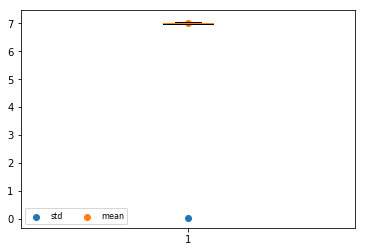

In [27]:
# summarize model performance
def summarize_scores(name, scores):
    # input:
        # name: string, model name
        # scores: repeat_evaluate() output array
    # output: 
        # none
    #### WRITE YOUR CODE HERE ####
    
    mean_scores = numpy.array(scores).mean()
    std_scores = numpy.array(scores).std()
    
    print('The mean score is', mean_scores)
    print('The standard deviaton of the scores is', std_scores)
    
    pyplot.boxplot(numpy.array(scores))
    std_s = pyplot.scatter(x=1, y=std_scores)
    mean_s = pyplot.scatter(x=1, y=mean_scores)
    pyplot.legend((std_s, mean_s),
                 ('std', 'mean'),
                 scatterpoints=1,
                 loc='lower left',
                 ncol=3,
                 fontsize=8)
    pyplot.show()
    
# summarize scores
summarize_scores('lstm', scores)

# Stacked LSTM

The vanilla LSTM, containing only one hidden layer, can solve some easy problems. In order to solve more complicated problems "we have to go deeper" (if the term *deep learning* was not clear, now it is). By stacking several hidden layers the LSTM Network can learn more complex characteristics of the system (time series, image, text, video, etc.) and produce a better output (forecast, text, sequence, etc.).

<img src="images\we-have-to-go-deeper.png" alt="drawing" style="width:500px;"/>
<p style="text-align: center;">
    Fig. 5 - In order to solve more complex problems, it is important to expand the network vertically, i.e. stacking layers. [Image Reference: Inception movie (2010)]
</p>

The Stacked LSTM is a model that has multiple hidden LSTM layers where each layer contains multiple memory cells. Given that LSTMs operate on sequence data, it means that the addition of layers adds levels of abstraction of input observations over time. [3] RNNs are inherently deep in time, since their hidden state is a function of all previous hidden states. They can also benefit from depth in space; that is from stacking multiple recurrent hidden layers on top of each other. [9] Figure 6 shows a stacked LSTM network with two hidden layers. 

<img src="images\stackedlstm.png" alt="drawing" style="width:100px;"/>
<p style="text-align: center;">
    Fig. 6 - Network structure for a stacked LSTM model. The amount of LSTM layers depends on the application. [3]
</p>

The stacked LSTM model expects a list of six model hyperparameters, which are:

- n_input: The number of lag observations to use as input to the model.
- n_layers: The number of LSTM hidden layers.
- n_nodes: The number of LSTM units in each hidden layer. This parameter has to be an array with the respective value per layer.
- n_epochs: The number of times to expose the model to the whole training dataset.
- n_batch: The number of samples within an epoch after which the weights are updated.
- n_freq: The frequency of the series, used for the seasonal decomposition.

Each LSTM memory cell requires a 3D input. When an LSTM processes one input sequence of time steps, each memory cell will
output a single value for the whole sequence as a 2D array. To stack LSTM layers, we need to change the configuration of the prior LSTM layer to output a 3D array as input for the subsequent layer. We can do this by setting the return sequences
argument on the layer to True (default is False). This will return one output for each input time step and provide a 3D array. Figure 7 shows how the code should look like for two hidden LSTM layers. 

<img src="images\stacking_lstm_code.png" alt="drawing" style="width:700px;"/>
<p style="text-align: center;">
    Fig. 7 - Code to define a Stacked LSTM with 2 hidden layers. [3]
</p>

Change the functions you wrote before for the Vanilla LSTM with the possibility to have a previously defined amount of hidden layers in the model. Be careful with the definition of n_nodes; in this case it is an array with the number of LSTM units in each hidden layer and not anymore a single integer value as before. Fill the following snippet with your new code.

In [29]:
#### WRITE YOUR CODE HERE ####
def model_stack_fit(train, config):
    # input:
        # train: time series data in ndarray format. Shape: (time series length x 1)
        # config: list of model hyperparameters
    # return:
        # model: trained LSTM model
        
        
    # unpack config
    n_input,n_layers,n_nodes, n_epochs, n_batch, n_freq = config
    # prepare data: deseasonalize the input data as preparation of the training dataset   
    #### WRITE YOUR CODE HERE ####
    #The additive model is described as Y[t] = T[t] + S[t] + e[t]
    train_add = seasonal_decompose(train, model='additive',freq=n_freq)
    train = train - train_add.seasonal # save the deseasonalized input data here
    
    # Change the format of the dataset to be used in supervised learning   
    # Consider one element to be forecasted (forecast sequence length = 1)
    #### WRITE YOUR CODE HERE ####

    
    data = series_to_supervised(train,n_input,1) # ??
    
    
    ### END of your code ###
    
    # Devide the data in features and labels
    train_x, train_y = data[:, :-1], data[:, -1]

    # Reshape training features in the correct input format for LSTM networks
    train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
    
    # Define one LSTM hidden layer, one dense hidden layer and one output layer as a dense layer with one node
    model = Sequential()   
    #### WRITE YOUR CODE HERE ####
    
    #input_layer = Input(shape = train_x.shape[:1], name='Input_MLP') # channels last
    
    model.add(LSTM(n_nodes[0],return_sequences=True,activation='relu',input_shape=(n_input,1)))
    for n_node in n_nodes[1:-1]:
        model.add(LSTM(n_node,return_sequences=True,activation='relu'))
    model.add(LSTM(n_nodes[n_layers-1],activation='relu'))
    model.add(Dense(n_nodes[n_layers-1],activation='relu'))
    model.add(Dense(1))
   
    
    ### END of your code ###
    
    model.compile(loss='mse', optimizer='sgd')
    # fit
    #input_shape=(samples,shape,input_dim)
    model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
    
    return model


**Bonus Question:** Let's consider you want to forecast several time series using the same network. What do you have to change in the stacked LSTM network you programmed before to have several outputs instead of just one? <br>
**Answer:** We have to increase the parameter for the last dense layer.

### Diagnosing under- and overfitting
One of the important checks to do to your model is that of under- and overfitting. For this you need the training and validation loss functions produced by the Keras *fit()* function of your model. These values are saved in the *History* object returned by this function. <br> 
Normally the History object contains the training/validation accuracy and loss functions, but this can change from solution to solution. To check what the History object contains, use
```python 
# list all data in history
print(history.history.keys())
>> ['acc', 'loss', 'val_acc', 'val_loss']
```
Change the function **model_fit()** to collect and plot the loss function for the training and the validation processes. Since a variable named *history* is already used in the function *walk_forward_validation()* to store past data, here the name **model_metric** shall be used for the History output object of the Keras function *fit()*. <br>
To split the training dataset into a validation set use the parameter *validation_split* from the Keras function *fit()*. A splitting ratio of a third from the whole set should be enough.

C:\tools\Anaconda3\envs\Lama1\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


 > 6.988


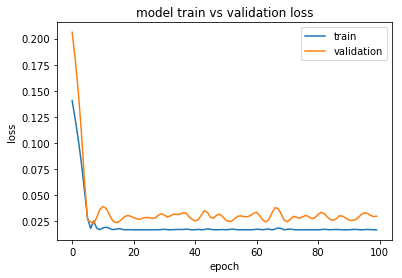

In [31]:
import numpy as np

def model_fit(train, config):
    # input:
        # train: time series data in ndarray format. Shape: (time series length x 1)
        # config: list of model hyperparameters
    # return:
        # model: trained LSTM model
        # model_metric: History output object of the Keras function fit()
        
    #### WRITE YOUR CODE HERE ####

    n_input,n_layers, n_nodes, n_epochs, n_batch, n_freq = config

    #The additive model is described as Y[t] = T[t] + S[t] + e[t]
    train_add = seasonal_decompose(train, model='additive',freq=n_freq)
    train = train - train_add.seasonal # save the deseasonalized input data here
   
    data = series_to_supervised(train,n_input,1) 
    
    
    # Devide the data in features and labels
    train_x, train_y = data[:, :-1], data[:, -1]

    # Reshape training features in the correct input format for LSTM networks
    train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
    
    model = Sequential()   
   
    #input_layer = Input(shape = train_x.shape[:1], name='Input_MLP') # channels last
    
    model.add(LSTM(n_nodes[0],return_sequences=True,activation='relu',input_shape=(n_input,1)))
    for n_node in n_nodes[1:-1]:
        model.add(LSTM(n_node,return_sequences=True,activation='relu'))
    model.add(LSTM(n_nodes[n_layers-1],activation='relu')) # before feed to dense reshape the output of the LSTM
    #model.add(Dropout(0.6))
    model.add(Dense(n_nodes[n_layers-1],activation='relu'))
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='adam')
    # fit
    #input_shape=(samples,shape,input_dim)
    model_metric = model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0,validation_split=0.3)
    #validation_split=0.3
    
    return model, model_metric

def model_predict(model, history, config):
    # input:
        # model: model returned by model_fit()
        # history: all available data from the past
        # config: list of model hyperparameters
    # return: 
        # prediction: corrected prediction of the model with the seasonal term back
        
    # unpack config
    n_input,_, _, _, _, n_freq = config
    
    # prepare data: deseasonalize the input data as preparation of the training dataset   
    # the correction term has to be used after predicting, in order to give back the seasonality to the data
    #### WRITE YOUR CODE HERE ####
    #history = 0 # ??
    #correction = 0 # ??
    history_add = seasonal_decompose(history, model='additive',freq=n_freq)
    history = history - history_add.seasonal
    
    correction = history_add.seasonal
    
    ### END of your code ###
    
    x_input = array(history[-n_input:]).reshape((1, n_input, 1))
    
    # forecast
    yhat = model.predict(x_input, verbose=0)
    
    return correction[-n_freq] + yhat[0]
def walk_forward_validation(data, n_test, cfg):
    # input:
        # data: time series in ndarray format
        # n_test: integer, splitting index in the array
        # cfg: list of model hyperparameters
    # output:
        # error: rmse of predictions from the test set
        # model_metric: History output object of model_fit()
    
   
    # Initialize the predictions array
    predictions = list()
    
    #normalized
    values = data
    values = values.reshape((len(values), 1))

    # train the normalization
    #scaler = StandardScaler()
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(values)

    # normalize trainset
    normalized_data = scaler.transform(values)
    data = normalized_data.reshape((-1))
    
    
 
    
    #split the dataset
    train, test = train_test_split(data, n_test)# ??
    
    # fit LSTM model
    
    model,model_metric= model_fit(train, cfg) # ??

    # Initialize history array with training dataset as historical data
    history = [x for x in train]
    
    # step over each timestep in the test set
    for i in range(len(test)):
        # make forecast for history
        yhat = model_predict(model, history, cfg)
        
        
        # store forecast in list of predictions
        predictions.append(yhat)
        
        # add actual observation to history for the next loop
        history.append(test[i])
    
    
    test = test.reshape((len(test), 1))
    test = scaler.inverse_transform(test)
    test = test.reshape((-1))
    
    predictions = np.array(predictions)
    predictions = predictions.reshape((len(predictions), 1))
    predictions = scaler.inverse_transform(predictions)
    predictions = predictions.reshape((-1))
    # estimate prediction error
    error = measure_rmse(test, predictions)
    print(' > %.3f' % error)
    
    return error, model_metric

data = series.values
# data split: Forecasting the last month data
n_test = 31
# define config: [n_input, n_layers, n_nodes, n_epochs, n_batch, n_freq]
config = [36, 3, [50, 30, 50], 100, 100, 12]
# grid search
score, model_metric = walk_forward_validation(data, n_test, config)

# Plot train and validation loss
pyplot.plot(model_metric.history['loss'])
pyplot.plot(model_metric.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

Analize the graphs you obtained from the under-/overfitting analysis. What can you conclude about your model? Would you change something to improve your results? If so, please do the changes and write here a short report of your observations. 
(Hint: If you would like to know more about the anaylsis of the train and validation loss plots, you can look at the following [tutorial to over- and underfitting from tensorflow](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit))

**Answer:** The model is not underfitted, only slightly overfitted. We can prevent that by using dropout, regularization, batch normalization, data augmentation or more data. 
If we then underfit we can also use learning-rate decay.

### Some final hints 

Before ending the introduction to LSTMs, some hints concerning the network hyperparameters should be considered:

- The exploiding gradient problem can stay there: LSTMs have not anymore the problem of the vanishing gradients as the conventional RNNs have. However the exploiding gradient problem can still be present on LSTM models. Therefore clipping the gradients is a good solution to this (For more information check [this article](https://machinelearningmastery.com/exploding-gradients-in-neural-networks/)).
- Initialize the forget gates with high bias, in order to encourage remembering at the start of the training process. 
- Consider that L2 regularization sometimes does not help when working with LSTM networks.
- Dropout is always good to implement in the recurrent part of the network (not in the time axis of the network).

## Additional Resources to LSTMs
If you like to see what kind of projects are out there already implemented and available to play with, check these links:

- Paper: [Visualizing and understanding recurrent networks](https://arxiv.org/abs/1506.02078) from Andrej Karpathy, Justin Johnson, Li Fei-Fei. 2015
- [Video from Andrej Karphaty](https://skillsmatter.com/skillscasts/6611-visualizing-and-understanding-recurrent-networks)
- Project [NeuralTalk (Image Caption Generator using Python+numpy)](https://github.com/karpathy/neuraltalk)
- Project [NeuralTalk2 (Image Caption Generator using Torch)](https://github.com/karpathy/neuraltalk2)
- GoogleBrain Project [Show and Tell (Image Caption Generator using TensorFlow)](https://ai.googleblog.com/2016/09/show-and-tell-image-captioning-open.html)
- Project: [Composing Music With Recurrent Neural Networks](http://www.hexahedria.com/2015/08/03/composing-music-with-recurrent-neural-networks/)
- Article: [Understanding LSTM and its diagrams](https://medium.com/mlreview/understanding-lstm-and-its-diagrams-37e2f46f1714)
- Article: [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)
- Article: [The magic of LSTM neural networks](https://medium.com/datathings/the-magic-of-lstm-neural-networks-6775e8b540cd)

# Text generator with LSTM

Now, if you want to get your hands dirty on LSTM Models, we recommend you to work on the text generator project found in the RNN's folder. This project is based on the code from Jason Brownlee at [How to Develop a Word-Level Neural Language Model and Use it to Generate Text](https://machinelearningmastery.com/how-to-develop-a-word-level-neural-language-model-in-keras/). 

This task is not evaluated. However, it will help you get a deeper understanding on how LSTM Models work. This will make easier for you to select the algorithm you will use to solve your "Into the Wild" project. 

# References
[1] J. Brownlee, Introduction to time series forecasting with python: how to prepare data and develop models to predict the future. 2018.<br>
[2] J. Brownlee, Deep Learning for Time Series Forecasting: predict the Future with MLPs, CNNs and LSTMs in Python. 2018.<br>
[3] J. Brownlee, Long Short-Term Memory Networks With Python: Develop Sequence Prediction Models With Deep Learning. 2017.<br>
[4] G. Shmueli, Practical Time Series Forecasting with R: A Hands-On Guide, 2nd ed. Axelrod Schnall Publishers, 2016.<br>
[5] I. Sutskever, O. Vinyals, and Q. V. Le, “Sequence to Sequence Learning with Neural Networks,” in Neural Information Processing Systems Conference, 2014.<br>
[6] H. Sak, A. Senior, and F. Beaufays, “Long Short-Term Memory Recurrent Neural Network Architectures for Large Scale Acoustic Modeling.”<br>
[7] K. Greff, R. K. Srivastava, J. Koutník, B. R. Steunebrink, and J. Schmidhuber, “LSTM: A Search Space Odyssey,” Trans. Neural Networks Learn. Syst., 2017.<br>
[8] S. Hochreiter and Ju. Schmidhuber, “Long Short-Term Memory,” Neural Comput., vol. 9, no. 8, pp. 1735–1780, 1997.<br>
[9] A. Graves, A. Mohamed and G. Hinton, "Speech Recognition With Deep Recurrent Neural Networks", 2013. <br>
[10] PennState Eberly College of Science, “5.1 Decomposition Models | STAT 510,” 2018. [Online]. Available: https://onlinecourses.science.psu.edu/stat510/node/69/. [Accessed: 14-Nov-2018].<br>
[11] A. Karpathy: The Unreasonable Effectiveness of Recurrent Neural Networks. http://karpathy.github.io/2015/05/21/rnn-effectiveness/. Version: 2015. [Last Checked: 28.09.2018]. <br>
[12] J. Brownlee: How to develop Deep Learning Models for univariate time series forecasting. https://machinelearningmastery.com/how-to-develop-deep-learning-models-for-univariate-time-series-forecasting/. Version: October, 2018. [Last Checked: 19.05.2019].